<a href="https://colab.research.google.com/github/mahidhiman12/pytorch/blob/main/4_PyTorch_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is a classification problem?

- In machine learning, a classification problem involves categorizing data into predefined classes or categories. Essentially, the goal is to train a model to predict which category a new, unseen data point belongs to, based on its features

1. Spam detection: Classifying emails as either spam or not spam.
2. Image recognition: Identifying objects in images, like cats or dogs.
3. Medical diagnosis: Predicting whether a patient has a disease or not.
4. Customer segmentation: Dividing customers into different groups based on their behavior

Types of Classification:
1. **Binary Classification**: Involves two classes (e.g., spam/not spam).
2. **Multiclass Classification**: Involves more than two classes (e.g., classifying handwritten digits 0-9).
3. **Multilabel classification** : Involves more than two labels
3. **Imbalanced Classification**: Occurs when the number of data points in each class is unevenly distributed

**Now** , Except instead of trying to predict a straight line (predicting a number, also called a regression problem), we'll be working on a classification problem.

## Architecture of a classification model:

- Input layer shape (`in_features`) : Same as number of features ( eg: 5 for age , swx , height , weight , smoking status in heart disease prediction)

- Hidden layers : Problem specific , min 1 , max - unlimited

- Neurons per hidden layer : Problem specific , generally 10 to 512

- Output layer shape (`out_features`): 1 in binary classification , 1 per class in multiclass classification

- Hidden layer activation : Usually ReLU but can be others

- Output activation : Sigmoid in binary classification , Softmax in Multiclass classification

- Loss function : Binary crossentropy in binary classification , Cross entropy in multiclass classification

- Optimizer : Can be any , eg: SGD , Adam etc

# Make classification data and get it ready

In [2]:
import sklearn
import torch

In [3]:
from sklearn.datasets import make_circles

# Make 1000 sampkes
n_samples = 1000

# Create circles
# Remember , X - feature matrix so thats in capital , y(labels) - scalar
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [4]:
# X:features
# y:labels
len(X) , len(y)

(1000, 1000)

In [5]:
print(f"First 5 samples of X : \n {X[:5]}")
print(f"\n First 5 samples of y : {y[:5]}")

# We have 2 features of X , which relates to one label of  y

First 5 samples of X : 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

 First 5 samples of y : [1 1 1 1 0]


In [6]:
# Lets have a look at y
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

All 0s and 1s , We have 2 classes (0 or 1) , Thats binary classification

## Make DataFrame of circle data using pandas

In [7]:
import pandas as pd
# [ 0.75424625  0.23148074]
#       X1          X2

# Everything in the 0th index wil be X1 , and everything in the first index
# is X2

circles = pd.DataFrame({"X1": X[: , 0] ,
                        "X2": X[: , 1] ,
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


## Visualize data using matplotlib

Text(0, 0.5, 'X2')

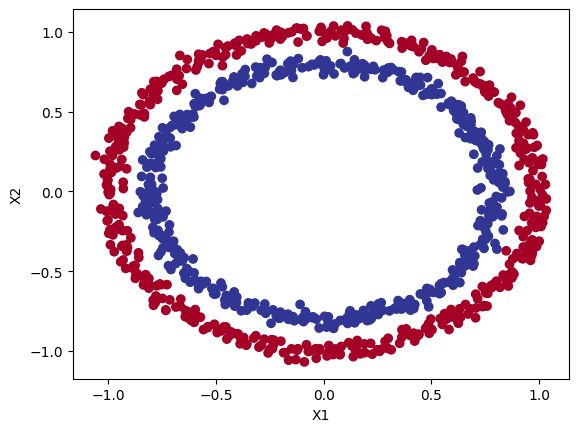

In [8]:
import matplotlib.pyplot as plt

plt.scatter(x = X[:,0],
            y = X[: , 1],
            c = y,
            cmap = plt.cm.RdYlBu)

plt.xlabel("X1")
plt.ylabel("X2")

So what are we trying to do here?

This is our data and we are working on classification , i.e we are trying to predict if something is one thing or another

So our problem is that we are trying to seperate these two circles

Given two numbers (X1 , X2) which are the two coordinates here , we want to predict the label , is it going to be a blue dot or a red dot?

Note: The data we are working on is often referred to as a toy dataset , a dataset that is small enough to experiment with
but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes:

We are working with PyTorch , SO we want the data to be in tensors

In [9]:
# X has 2 features and y is a scalar
X.shape , y.shape

((1000, 2), (1000,))

In [10]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"""Value for one sample of X : {X_sample} ,
      \n and value for one sample of y : {y_sample}""")

print(f"""\n Shapes for one sample of X : {X_sample.shape} ,
      \n and shapes for one sample of y : {y_sample.shape}""")

Value for one sample of X : [0.75424625 0.23148074] ,
      
 and value for one sample of y : 1

 Shapes for one sample of X : (2,) ,
      
 and shapes for one sample of y : ()


### 1.2 Turn data into tensors and create train and test splits

In [11]:
torch.__version__

'2.6.0+cu124'

In [12]:
# convert data from numpy to tensors
# X = X.type(torch.float32)
# y = torch.from_numpy(y).type(torch.float32) # Also convert y to a tensor

In [13]:
type(X) , type(y) , X.dtype , y.dtype

(numpy.ndarray, numpy.ndarray, dtype('float64'), dtype('int64'))

In [14]:
# Split
from sklearn.model_selection import train_test_split
# train_test_split splits arrays or matrices into random train and test subsets
# random state is just like random seed in sklearn
X_train , X_test  ,  y_train , y_test = train_test_split(X,
                                                         y ,
                                                         test_size = 0.2 ,
                                                         random_state = 42
                                                         )

In [15]:
len(X_train) , len(y_train) , len(X_test) , len(y_test)

(800, 800, 200, 200)

### 2. Building a model

Lets build a model to classify our blue and red dots

To do so, we want to:

1. Set up device agnostic code so our code will run on an GPU if there is one

2. Construct a model (by subclassing nn.Module)

3. Define a loss function and optimizer

4. Create a training and testing loop

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we have setup device agnostic code , lets create a model that:

1. Subclasses `nn.Module` : almost all models in PyTorch subclass `nn.Module`

2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data

3. Define a `forward()` method that outlines the forward pass (or forward computation) of our model

4. Instantiate an instance of our model class and send it to the target `device`

- The more hidden features theres are , the more opportunity our model has to learn patterns in the data , So to begin with , it has only 2 numbers to learn patterns on , but when we upscale it to 5 , it has 5 numbers to learn patterns on

- its like -> in_features : no of inputs , out_features : no of neurons

- no of neurons are generally multiples of 8

In [21]:
from torch import nn
# 1.

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # 2.
    # X has 2 features so in features is 2 and upscales to 5 features
    self.Layer1 = nn.Linear(in_features =2 , out_features = 5)
    # out features of previous layer should match with in features of another layer
    # thats how we connect layers
    self.layer2 = nn.Linear(in_features=5 , out_features=1)

  #  3.
  def forward(self,x):
    return self.layer2(self.layer1(X))
    # x-> layer1 -> layer2 -> output

# 4.
model_0 = CircleModelV1().to(device)
model_0


CircleModelV1(
  (Layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

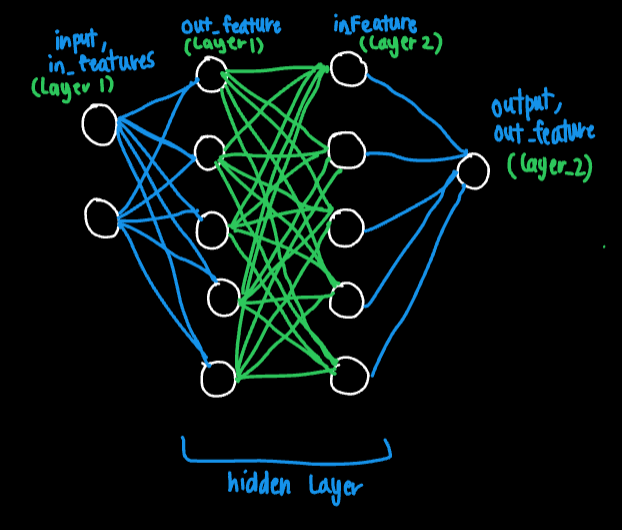

In [24]:
# check models parameters device
next(model_0.parameters()).device

device(type='cuda', index=0)

- Check out Tensorflow playground to understand neural networks , we can replicate it there manually